In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk


In [15]:
# Read the Excel file named 'integrated data.xlsx' and load the data from the sheet named 'Sheet1'
df = pd.read_excel('integrated data.xlsx',sheet_name='Sheet1')
# Display the first five rows of the dataframe to check its structure and contents
df.head()

,Job Title,Company Name,Column3,Column2,Column22,Location,Salary,Employ Types,Intern,Job Field,Column1,JD
0,Engineer (Entry-Level),MBP,NaN,NaN,NaN,"Wayne, PA",NaN,NaN,no,General Engineer,NaN,NaN
1,Building Envelope/Structural Engineer - Entry ...,Premier Building Restoration,NaN,NaN,NaN,"Glenside, PA",$80K - $130K / yr,Full-time,no,Structural Engineer,NaN,NaN
2,Project Engineer (entry level) (construction i...,"Sevenson Environmental Services, Inc.",NaN,NaN,NaN,"Philadelphia, PA","$188,000 / yr",Full-time,no,Construction Engineer,NaN,NaN
3,Field Service Engineer,"Moyer Instruments, Inc.",NaN,NaN,NaN,"Tamaqua, PA",$40K - $60K / yr,Full-time,no,Field Service Engineer,NaN,NaN
4,Power Generation Field Service Engineer,Penncat Corporation,NaN,NaN,NaN,"North Wales, PA",$30 - $45 / hr,Full-time,no,Power Generation Engineer,NaN,NaN


In [16]:
# Display the current number of rows and columns in the dataframe to verify changes
df.shape

(1305, 12)

In [17]:
# Remove rows from the dataframe where the 'JD' column has missing values
df.dropna(subset=['JD'],inplace=True)
df.shape

(209, 12)

In [18]:
# Remove duplicate rows in the dataframe based on the combination of 'Job Title' and 'Company Name'
df.drop_duplicates(subset=['Job Title','Company Name'],inplace=True)
# Display the current number of rows and columns after all the filters
df.shape

(190, 12)

In [19]:
# Display the names of all columns in the dataframe to review its current structure
df.columns

Index(['Job Title', 'Company Name', 'Column3', 'Column2', 'Column22',
       'Location', 'Salary', 'Employ Types', 'Intern', 'Job Field', 'Column1',
       'JD'],
      dtype='object')

In [20]:
# Reorder and select specific columns in the dataframe, creating a new dataframe with the specified columns
df = df[['Job Title', 'Company Name', 'Column2', 'Column22', 'Salary', 'Employ Types', 'Intern',
       'JD']]

In [21]:
# Display the first five rows of the dataframe to check its structure and contents
df.head()

,Job Title,Company Name,Column2,Column22,Salary,Employ Types,Intern,JD
196,Zinc Die Casting Engineer,Trotter Workforce,Mechanical Engineering,Scranton,"$90,000 - $115,000 a year",Full-time,NaN,Zinc Die Casting Engineer - Direct Hire - Imme...
198,Water Quality Specialist Trainee (Environmenta...,Commonwealth of PA,Civil/Environmental Engineering,Lackawanna County,"$44,010 - $66,348 a year",Full-time,NaN,THE POSITION\n \n \n Are you eager to emb...
199,VP of Operations - Manufacturing,"Iridium Industries, Inc./ Artube",Others,East Stroudsburg,NaN,Full-time,NaN,VICE PRESIDENT - OPERATIONS\nWe are a well-est...
200,"Vice President, Cement Project Engineering","Heidelberg Materials US, Inc.",Cement Project Engineering,Allentown,NaN,Full-time,NaN,AutoReqId: 18934BR \n Pay Class: Salaried Exem...
201,UIG - Process Engineer I,"Universal Industrial Gases, LLC",Manufacturing/Industrial Engineering,Bethlehem,NaN,Full-time,NaN,Job Details \n Division: Universal Industrial ...


In [22]:
engineering_skills_corpus = [
    "Mechanical", "Design",
    "CAD", "CAM", "Software",
    "Finite", "Element",
    "Manufacturing", "Processes", "Drawing",
    "Problem", "Solving",
    "Teamwork",
    "Communication",    "Data", "Analysis",
    "Mathematics",
    "Physics",
    "Material", "Science",
    "Machine",
    "Thermodynamics",
    "Fluid", "Mechanics",
    "Heat", "Transfer", "Ethics",
    "Critical", "Thinking",
    "Creativity",
    "Safety", "Procedures",
    "Quality",
    "Root", "Cause",
    "Lean",
    "Six", "Sigma",
    "Automotive",
    "Aerospace",
    "HVAC", "Systems",
    "Technical", "Writing",
    "Presentation",
    "Time", "Management",
    "Adaptability",
    "Continuous", "Learning",
    "Computer", "Aided",
    "3D", "Printing",
    "Robotics", "Basics",
    "Piping",
    "Instrumentation", "Control",
    "Energy", "Efficiency",
    "Hydraulics",
    "Pneumatics",
    "Electric", "Drives",
    "Industry", "Standards",
    "Regulatory", "Compliance",
    "Professional", "Networking",
    "Resume", "Building",
    "Interview", "Preparation","Analog", "Circuits",
    "Digital", "Circuits",
    "Microcontrollers",
    "Signal", "Processing",
    "Power", "Electronics",
    "Control", "Systems",
    "Embedded", "Systems",
    "Electric", "Machines",
    "Renewable", "Energy",
    "Power", "Systems",
    "Electric", "Power", "Generation",
    "Electromagnetics",
    "Electrical", "Safety",
    "Instrumentation",
    "Circuit", "Design",
    "PCB", "Layout",
    "Analog", "Digital", "Systems",
    "Electrical", "Drawings",
    "Electric", "Circuits", "Analysis",
    "MATLAB",
    "LabVIEW",
    "PLC", "Programming",
    "Power", "Distribution",
    "Transformer", "Design",
    "Motor",
    "Electric", "Drives",
    "Renewable", "Energy", "Systems",
    "Electric", "Grid",
    "High", "Voltage",
    "Low", "Voltage", "Systems",
    "Semiconductor", "Devices",
    "Electrical", "Testing",
    "Troubleshooting",
    "Technical", "Documentation",
    "Communication",
    "Project", "Management",
    "Teamwork",
    "Problem", "Solving",
    "Critical", "Thinking",
    "Adaptability",
    "Continuous", "Learning",
    "Professionalism",
    "Safety", "Regulations",
    "Industry", "Standards",
    "Regulatory", "Compliance","Structural",
    "Geotechnical",
    "Construction", "Management",
    "Project", "Management",
    "Surveying",
    "AutoCAD",
    "Civil", "3D", "Modeling",
    "Building", "Codes",
    "Structural", "Analysis",
    "Foundation", "Design",
    "Construction", "Materials",
    "Concrete",
    "Steel", "Structures",
    "Reinforced", "Concrete",
    "Construction", "Safety",
    "Construction", "Cost", "Estimation",
    "Environmental",
    "Hydraulics",
    "Transportation",
    "Highway",
    "Water", "Resources",
    "Geographic", "Information", "Systems",
    "GIS", "Software",
    "Soil", "Mechanics",
    "Urban", "Planning",
    "Sustainable", "Design",
    "Site", "Development",
    "Geology",
    "Land", "Development",
    "Construction", "Drawings",
    "Technical", "Report", "Writing",
    "Communication",
    "Problem", "Solving",
    "Critical", "Thinking",
    "Teamwork",
    "Adaptability",
    "Continuous", "Learning",
    "Safety", "Regulations",
    "Industry", "Standards",
    "Regulatory", "Compliance",
    "Resume", "Building",
    "Interview", "Preparation","Chemical", "Processes",
    "Process", "Simulation",
    "Unit", "Operations",
    "Reaction",
    "Thermodynamics",
    "Mass", "Transfer",
    "Heat", "Transfer",
    "Fluid", "Mechanics",
    "Separation", "Processes",
    "Distillation",
    "Absorption",
    "Adsorption",
    "Extraction",
    "Crystallization",
    "Filtration",
    "Reactors",
    "Catalysis",
    "Polymer",
    "Polymers",
    "Materials", "Science",
    "Process", "Design",
    "Process", "Control",
    "Chemical", "Plant", "Operation",
    "Safety", 
    "Environmental",
    "Hazardous", "Waste", "Management",
    "Regulatory", "Compliance",
    "Technical", "Report", "Writing",
    "Communication",
    "Problem", "Solving",
    "Critical", "Thinking",
    "Teamwork",
    "Adaptability",
    "Continuous", "Learning",
    "Industry", "Standards",
    "Safety", "Regulations",
    "Resume", "Building",
    "Interview", "Preparation","Nuclear", "Reactor", "Physics",
    "Nuclear", 
    "Radiation", "Protection",
    "Nuclear", "Safety",
    "Reactor", "Design",
    "Nuclear", "Fuel", "Cycle",
    "Radiation", "Shielding",
    "Thermal", "Hydraulics",
    "Nuclear", "Instrumentation",
    "Nuclear", "Materials",
    "Nuclear", "Waste", "Management",
    "Nuclear", "Proliferation", "Safeguards",
    "Nuclear", "Security",
    "Nuclear", "Regulations",
    "Nuclear", "Emergency", "Preparedness",
    "Nuclear", "Policy", "Analysis",
    "Radiation", "Detection",
    "Radiological", "Assessment",
    "Nuclear", "Forensics",
    "Nuclear", "Energy", "Economics",
    "Nuclear", "Reactor", "Simulation",
    "Radiation", "Dosimetry",
    "Nuclear", "Ethics",
    "Technical", "Report", "Writing",
    "Communication",
    "Problem", "Solving",
    "Critical", "Thinking",
    "Teamwork",
    "Adaptability",
    "Continuous", "Learning",
    "Industry", "Standards",
    "Safety", "Regulations",
    "Resume", "Building",
    "Interview", "Preparation","Programming",
    "Software", "Development",
    "Object-Oriented", "Programming",
    "Algorithms",
    "Data", "Structures",
    "Software", "Design",
    "Database", "Management",
    "Web", "Development",
    "Mobile", "Development",
    "Version", "Control", "Systems",
    "Debugging",
    "Testing",
    "Agile", "Methodologies",
    "Scrum", "Methodologies",
    "Continuous", "Integration",
    "Continuous", "Deployment",
    "Git",
    "Java",
    "Python",
    "C++",
    "JavaScript",
    "HTML",
    "CSS",
    "SQL",
    "NoSQL",
    "Node.js",
    "React",
    "Angular",
    "Vue.js",
    "Spring", "Framework",
    "Django",
    "Ruby", "Rails",
    "ASP.NET",
    "RESTful", "APIs",
    "Microservices",
    "Cloud", "Computing",
    "Docker",
    "Kubernetes",
    "CI/CD", "Pipeline",
    "Problem", "Solving",
    "Critical", "Thinking",
    "Teamwork",
    "Communication",
    "Project", "Management",
    "Agile", "Development",
    "Scrum", "Development",
    "Adaptability",
    "Continuous", "Learning",
    "Industry", "Standards",
    "Safety", "Regulations",
    "Resume", "Building",
    "Interview", "Preparation"
]

# Convert all elements in the 'engineering_skills_corpus' list to lowercase
engineering_skills_corpus = [element.lower() for element in engineering_skills_corpus]
# Remove duplicate elements from the 'engineering_skills_corpus' list by converting it to a set, then back to a list
engineering_skills_corpus =list(set(engineering_skills_corpus))

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Download the 'punkt' tokenizer models from the NLTK package, used for splitting text into sentences and words
nltk.download('punkt')
# Download the 'stopwords' dataset from the NLTK package, which contains common words that are usually ignored in text processing
nltk.download('stopwords')
# Display the current number of rows and columns in the dataframe 'df' to verify its size
df.shape    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kakka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kakka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(190, 8)

In [24]:

# Define a function to extract key skills from a job description using a provided corpus
def extract_key_skills(job_description, corpus, top_n=10):
    # Initialize TF-IDF vectorizer
    vectorizer = TfidfVectorizer(vocabulary=corpus)
    
    # Compute TF-IDF scores
    tfidf_matrix = vectorizer.fit_transform([job_description])
    
    # Extract feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get TF-IDF scores
    tfidf_scores = tfidf_matrix.toarray()[0]
    
    # Sort skills by TF-IDF score
    skill_scores = list(zip(feature_names, tfidf_scores))
    skill_scores.sort(key=lambda x: x[1], reverse=True)
    
    # Extract top skills
    top_skills = skill_scores[:top_n]
    
    return top_skills

# Define a function to preprocess text, including tokenization and lemmatization
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    filtered_tokens = [re.sub(r'[^\w\s]', '', token) for token in filtered_tokens]
    
    filtered_tokens = [token for token in filtered_tokens if token.strip()]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    return lemmatized_tokens


# Define a function to extract the most frequent keywords from tokens
def extract_keywords(tokens, top_n=15):
    # Count word frequencies
    word_freq = Counter(tokens)
    
    # Extract top 'top_n' keywords
    keywords = word_freq.most_common(top_n)
    
    return keywords

# Initialize an empty list to store skills
skill_list = []
# Loop through each row in the dataframe
for index,value in df.iterrows():
    # Preprocess the job description
    preprocessed_text = preprocess_text(value['JD'])
    
    # Extract keywords
    keywords = extract_keywords(preprocessed_text)
    
    print(value['Job Title'])
    print(value['Company Name'])
    # print("Keywords:")
    # for keyword, freq in keywords:
    #     print(keyword, ":", freq)
    
    # Extract key skills from job description
    key_skills = extract_key_skills(value['JD'], engineering_skills_corpus)
    
    sist = []
    print("Key Skills Needed for the Job:")
    for skill, score in key_skills:
        sist.append(skill)
        if score > 0:
            print(skill, "-", score)
            
    # Append the list of skills for this job to the main skill list        
    skill_list.append(sist)


Zinc Die Casting Engineer
Trotter Workforce
Key Skills Needed for the Job:
machines - 0.41702882811414954
drawings - 0.41702882811414954
time - 0.41702882811414954
interview - 0.41702882811414954
standards - 0.20851441405707477
design - 0.20851441405707477
quality - 0.20851441405707477
professional - 0.20851441405707477
operations - 0.20851441405707477
process - 0.20851441405707477
Water Quality Specialist Trainee (Environmental Trainee)
Commonwealth of PA
Key Skills Needed for the Job:
environmental - 0.7529469661657903
information - 0.5019646441105269
time - 0.18823674154144757
protection - 0.12549116102763172
professional - 0.12549116102763172
science - 0.12549116102763172
geology - 0.12549116102763172
interview - 0.12549116102763172
water - 0.12549116102763172
report - 0.06274558051381586
VP of Operations - Manufacturing
Iridium Industries, Inc./ Artube
Key Skills Needed for the Job:
manufacturing - 0.6495698024616309
operations - 0.4546988617231416
management - 0.32478490123081544

In [25]:
# Create a new DataFrame 'skills_df' from the list 'skill_list' which contains extracted skills
skills_df = pd.DataFrame({'skills':skill_list})
# Display the number of rows and columns in the 'skills_df' DataFrame to verify its size
skills_df.shape

(190, 1)

In [26]:
# Add the 'skill_list' as a new column 'skills' to the existing DataFrame 'df'
df['skills'] = skill_list

In [27]:
# Save the updated DataFrame 'df' to a CSV file named 'final_integrated_data_revised.csv' without the index column
df.to_csv('final_integrated_data_revised.csv',index=False)

In [34]:
import pandas as pd
# Read an Excel file named 'Local_Companies_LinkedIn.xlsx' into a DataFrame 'rashmi_df'
rashmi_df = pd.read_excel('Local_Companies_LinkedIn.xlsx')
# Display the DataFrame 'rashmi_df' to check its contents
rashmi_df

,JobId,Company,Job Title,Skills,Employment Type,Data Source,Location
0,1,Thermo Fisher Scientific Instruments,Client Services Project Manager III,Understanding and competent use of SOPs requir...,Experienced,Website,Allentown
1,2,Thermo Fisher Scientific Instruments,Continuous Improvement Specialist III,BA/ BA/BS degree from an accredited college...,Experienced,Website,Allentown
2,3,Thermo Fisher Scientific Instruments,"Engineer III, Validation","A four-year, Bachelor of Science degree fr...",Experienced,Website,Allentown
3,4,Mack Trucks,Material Technician,Assembly Lines\nCherry Picker\nForklift Opera...,Experienced,LinkedIn,Macungie
4,5,Mack Trucks,Director Business Development,Business Planning\nCommunication\nForeign Mil...,Experienced,LinkedIn,Allentown
...,...,...,...,...,...,...,...
90,91,Crayola,Project Engineer,\n Bachelor of Science in Engineering requi...,Experienced,Website,Easton
91,92,Crayola,Production Technician,\n High School or GED Degree required; Tech...,Experienced,Website,Easton
92,93,Crayola,Molding Technician,\n High school degree required (Associate’s...,Experienced,Website,Easton
93,94,Crayola,Electrical-Electronics Technician,\n Associate Degree or Specialized Diploma ...,Experienced,Website,Easton


In [35]:
# Read an Excel file named 'final_integrated_data_revised.csv' into a DataFrame 'jainil_df'
jainil_df = pd.read_csv('final_integrated_data_revised.csv')
# Display the data
jainil_df

,Job Title,Company Name,Column2,Column22,Salary,Employ Types,Intern,JD,skills
0,Zinc Die Casting Engineer,Trotter Workforce,Mechanical Engineering,Scranton,"$90,000 - $115,000 a year",Full-time,NaN,Zinc Die Casting Engineer - Direct Hire - Imme...,"['machines', 'drawings', 'time', 'interview', ..."
1,Water Quality Specialist Trainee (Environmenta...,Commonwealth of PA,Civil/Environmental Engineering,Lackawanna County,"$44,010 - $66,348 a year",Full-time,NaN,THE POSITION\n \n \n Are you eager to emb...,"['environmental', 'information', 'time', 'prot..."
2,VP of Operations - Manufacturing,"Iridium Industries, Inc./ Artube",Others,East Stroudsburg,NaN,Full-time,NaN,VICE PRESIDENT - OPERATIONS\nWe are a well-est...,"['manufacturing', 'operations', 'management', ..."
3,"Vice President, Cement Project Engineering","Heidelberg Materials US, Inc.",Cement Project Engineering,Allentown,NaN,Full-time,NaN,AutoReqId: 18934BR \n Pay Class: Salaried Exem...,"['project', 'materials', 'management', 'mechan..."
4,UIG - Process Engineer I,"Universal Industrial Gases, LLC",Manufacturing/Industrial Engineering,Bethlehem,NaN,Full-time,NaN,Job Details \n Division: Universal Industrial ...,"['process', 'separation', 'systems', 'design',..."
...,...,...,...,...,...,...,...,...,...
185,IT Litigation Support,"Contact Government Services, LLC4.8",Others,Allentown,USDÂ 60K - 92KÂ (Glassdoor est.),Full-time,NaN,IT Litigation Support\nEmployment Type: Full T...,"['systems', 'security', 'procedures', 'quality..."
186,Agile Coach,"Contact Government Services, LLC4.8",Others,Allentown,USDÂ 84K - 127KÂ (Glassdoor est.),Full-time,NaN,"Agile Coach\nEmployment Type: Full-Time, Exper...","['agile', 'scrum', 'planning', 'project', 'pro..."
187,Power Systems & Applications Manager,e-Business International INC3.6,Electrical Engineering,Bethlehem,USDÂ 120K - 140KÂ (Employer est.),Full-time,NaN,Job Description:\n\nRole: Power Systems & Appl...,"['power', 'design', 'simulation', 'circuit', '..."
188,Cloud Systems Architect,"Contact Government Services, LLC4.8",Others,Allentown,USDÂ 94K - 140KÂ (Glassdoor est.),Full-time,NaN,Cloud Systems Architect\nEmployment Type: Full...,"['cloud', 'systems', 'security', 'resources', ..."


In [36]:
# Copy the contents of the 'Skills' column into a new column named 'JD' in the DataFrame 'rashmi_df'
rashmi_df['JD'] = rashmi_df['Skills']

# Rename the 'Company' column to 'Company Name' in the DataFrame 'rashmi_df'
rashmi_df['Company Name'] = rashmi_df['Company']

# Rename the 'Location' column to 'Column22' in the DataFrame 'rashmi_df'
rashmi_df['Column22'] = rashmi_df['Location']

# Rearrange the DataFrame 'rashmi_df' to only include specific columns and in a particular order
rashmi_df = rashmi_df[['Job Title', 'Company Name', 'Column22', 'JD']]

# Display the modified DataFrame 'rashmi_df' to verify the changes
rashmi_df

,Job Title,Company Name,Column22,JD
0,Client Services Project Manager III,Thermo Fisher Scientific Instruments,Allentown,Understanding and competent use of SOPs requir...
1,Continuous Improvement Specialist III,Thermo Fisher Scientific Instruments,Allentown,BA/ BA/BS degree from an accredited college...
2,"Engineer III, Validation",Thermo Fisher Scientific Instruments,Allentown,"A four-year, Bachelor of Science degree fr..."
3,Material Technician,Mack Trucks,Macungie,Assembly Lines\nCherry Picker\nForklift Opera...
4,Director Business Development,Mack Trucks,Allentown,Business Planning\nCommunication\nForeign Mil...
...,...,...,...,...
90,Project Engineer,Crayola,Easton,\n Bachelor of Science in Engineering requi...
91,Production Technician,Crayola,Easton,\n High School or GED Degree required; Tech...
92,Molding Technician,Crayola,Easton,\n High school degree required (Associate’s...
93,Electrical-Electronics Technician,Crayola,Easton,\n Associate Degree or Specialized Diploma ...


In [37]:
df = pd.concat([jainil_df,rashmi_df])
df

,Job Title,Company Name,Column2,Column22,Salary,Employ Types,Intern,JD,skills
0,Zinc Die Casting Engineer,Trotter Workforce,Mechanical Engineering,Scranton,"$90,000 - $115,000 a year",Full-time,NaN,Zinc Die Casting Engineer - Direct Hire - Imme...,"['machines', 'drawings', 'time', 'interview', ..."
1,Water Quality Specialist Trainee (Environmenta...,Commonwealth of PA,Civil/Environmental Engineering,Lackawanna County,"$44,010 - $66,348 a year",Full-time,NaN,THE POSITION\n \n \n Are you eager to emb...,"['environmental', 'information', 'time', 'prot..."
2,VP of Operations - Manufacturing,"Iridium Industries, Inc./ Artube",Others,East Stroudsburg,NaN,Full-time,NaN,VICE PRESIDENT - OPERATIONS\nWe are a well-est...,"['manufacturing', 'operations', 'management', ..."
3,"Vice President, Cement Project Engineering","Heidelberg Materials US, Inc.",Cement Project Engineering,Allentown,NaN,Full-time,NaN,AutoReqId: 18934BR \n Pay Class: Salaried Exem...,"['project', 'materials', 'management', 'mechan..."
4,UIG - Process Engineer I,"Universal Industrial Gases, LLC",Manufacturing/Industrial Engineering,Bethlehem,NaN,Full-time,NaN,Job Details \n Division: Universal Industrial ...,"['process', 'separation', 'systems', 'design',..."
...,...,...,...,...,...,...,...,...,...
90,Project Engineer,Crayola,NaN,Easton,NaN,NaN,NaN,\n Bachelor of Science in Engineering requi...,NaN
91,Production Technician,Crayola,NaN,Easton,NaN,NaN,NaN,\n High School or GED Degree required; Tech...,NaN
92,Molding Technician,Crayola,NaN,Easton,NaN,NaN,NaN,\n High school degree required (Associate’s...,NaN
93,Electrical-Electronics Technician,Crayola,NaN,Easton,NaN,NaN,NaN,\n Associate Degree or Specialized Diploma ...,NaN


In [38]:
# Convert all entries in the 'Job Title' column of the DataFrame 'df' to lowercase for uniformity
df['Job Title'] = df['Job Title'].str.lower()

# Remove duplicate rows in the DataFrame 'df' based on the combination of 'Job Title' and 'Company Name'
df.drop_duplicates(['Job Title', 'Company Name'], inplace=True)

# Save the cleaned DataFrame 'df' to a CSV file named 'sample.csv' without the index column
df.to_csv('sample.csv', index=False)

In [39]:
# Initialize an empty list to store skills extracted from each job description
skill_list = []

# Iterate through each row in the DataFrame 'df'
for index, value in df.iterrows():
    # Preprocess the text in the 'JD' column to normalize and tokenize it
    preprocessed_text = preprocess_text(value['JD'])
    
    # Extract the most frequent keywords from the preprocessed text
    keywords = extract_keywords(preprocessed_text)
    
    # Print the job title and company name for reference
    print(value['Job Title'])
    print(value['Company Name'])
    # Uncomment the lines below to print keywords for each job
    # print("Keywords:")
    # for keyword, freq in keywords:
    #     print(keyword, ":", freq)
    
    # Extract key skills based on the preprocessed job description and a corpus of engineering skills
    key_skills = extract_key_skills(value['JD'], engineering_skills_corpus)
    
    # Initialize an empty list to store skills for this particular job
    sist = []
    print("Key Skills Needed for the Job:")
    # Iterate over the extracted skills and their scores
    for skill, score in key_skills:
        sist.append(skill)
        # Print the skill and its TF-IDF score if the score is greater than zero
        if score > 0:
            print(skill, "-", score)
    
    # Append the list of skills for this job to the main list
    skill_list.append(sist)

# Create a new DataFrame from the list of skills
skills_df = pd.DataFrame({'skills': skill_list})
# Print the shape of the new DataFrame to check the number of rows and columns
skills_df.shape

# Add the 'skill_list' as a new column in the original DataFrame 'df'
df['skills'] = skill_list

# Save the updated DataFrame 'df' with the skills column to a CSV file named 'final_integrated_data_revised.csv'
df.to_csv('final_integrated_data_revised.csv', index=False)

zinc die casting engineer
Trotter Workforce
Key Skills Needed for the Job:
machines - 0.41702882811414954
drawings - 0.41702882811414954
time - 0.41702882811414954
interview - 0.41702882811414954
standards - 0.20851441405707477
design - 0.20851441405707477
quality - 0.20851441405707477
professional - 0.20851441405707477
operations - 0.20851441405707477
process - 0.20851441405707477
water quality specialist trainee (environmental trainee)
Commonwealth of PA
Key Skills Needed for the Job:
environmental - 0.7529469661657903
information - 0.5019646441105269
time - 0.18823674154144757
protection - 0.12549116102763172
professional - 0.12549116102763172
science - 0.12549116102763172
geology - 0.12549116102763172
interview - 0.12549116102763172
water - 0.12549116102763172
report - 0.06274558051381586
vp of operations - manufacturing
Iridium Industries, Inc./ Artube
Key Skills Needed for the Job:
manufacturing - 0.6495698024616309
operations - 0.4546988617231416
management - 0.32478490123081544

In [2]:
import pandas as pd
# Load the CSV file named 'final_integrated_data_revised.csv' into a DataFrame 'df' using pandas
df = pd.read_csv('final_integrated_data_revised.csv')

# Display the DataFrame 'df' to verify its contents and structure
df

,Job Title,Company Name,Field,Location,Lower,Higher,Experience Required,JD,skills
0,zinc die casting engineer,Trotter Workforce,Manufacturing/Industrial Engineering,Scranton,90000.0,11500.0,NaN,Zinc Die Casting Engineer - Direct Hire - Imme...,"['machines', 'drawings', 'time', 'interview', ..."
1,water quality specialist trainee (environmenta...,Commonwealth of PA,Civil/Environmental Engineering,Lackawanna County,44010.0,66348.0,NaN,THE POSITION\n \n \n Are you eager to emb...,"['environmental', 'information', 'time', 'prot..."
2,vp of operations - manufacturing,"Iridium Industries, Inc./ Artube",Manufacturing/Industrial Engineering,East Stroudsburg,NaN,NaN,NaN,VICE PRESIDENT - OPERATIONS\nWe are a well-est...,"['manufacturing', 'operations', 'management', ..."
3,"vice president, cement project engineering","Heidelberg Materials US, Inc.",Cement Project Engineering,Allentown,NaN,NaN,NaN,AutoReqId: 18934BR \n Pay Class: Salaried Exem...,"['project', 'materials', 'management', 'mechan..."
4,uig - process engineer i,"Universal Industrial Gases, LLC",Manufacturing/Industrial Engineering,Bethlehem,NaN,NaN,NaN,Job Details \n Division: Universal Industrial ...,"['process', 'separation', 'systems', 'design',..."
...,...,...,...,...,...,...,...,...,...
277,project engineer,Crayola,Project Management/Engineering Management,Easton,NaN,NaN,NaN,\n Bachelor of Science in Engineering requi...,"['systems', 'electrical', 'mechanical', 'build..."
278,production technician,Crayola,Project Management/Engineering Management,Easton,NaN,NaN,NaN,\n High School or GED Degree required; Tech...,"['high', 'systems', 'technical', 'electrical',..."
279,molding technician,Crayola,Manufacturing/Industrial Engineering,Easton,NaN,NaN,NaN,\n High school degree required (Associate’s...,"['technical', 'electrical', 'electronics', 'me..."
280,electrical-electronics technician,Crayola,Electrical Engineering,Easton,NaN,NaN,NaN,\n Associate Degree or Specialized Diploma ...,"['high', 'electrical', 'electronics', 'regulat..."


In [5]:
# Initialize an empty list to store indicators of whether 'experience' is mentioned in the job description
exp_list = []

# Loop through each row in the DataFrame 'df'
for index, value in df.iterrows():
    # Print the job title and company name for each entry for clarity
    print(value['Job Title'])
    print(value['Company Name'])
    
    # Uncomment the lines below to print keywords for each job
    # print("Keywords:")
    # for keyword, freq in keywords:
    #     print(keyword, ":", freq)
    
    # Check if the word 'experience' is in the job description (case-insensitive)
    if 'experience' in value['JD'].lower():
        exp_list.append(1)  # Append 1 to 'exp_list' if 'experience' is found
        print('yes')
    else:
        exp_list.append(0)  # Append 0 otherwise
        print('no')

# Add a new column 'Experience Required' to the DataFrame 'df' based on the 'exp_list'
df['Experience Required'] = exp_list

# Display the DataFrame 'df' to verify the newly added column and data integrity
df

zinc die casting engineer
Trotter Workforce
yes
water quality specialist trainee (environmental trainee)
Commonwealth of PA
yes
vp of operations - manufacturing
Iridium Industries, Inc./ Artube
yes
vice president, cement project engineering
Heidelberg Materials US, Inc.
yes
uig - process engineer i
Universal Industrial Gases, LLC
yes
traffic engineer/superintendent
City of Bethlehem
yes
traffic engineer/superintendent
City of Bethlehem
yes
systems engineer
Schultz Technology Solutions, LLC
yes
structural engineer in training
D'Huy Engineering, Inc.
no
staff packaging engineer
Crayola
yes
sr. process engineer - glass melting
StarrTrax
yes
sr. electro-optical test development engineer
Infinera
yes
spring co-op - chemical engineer (2025)
Air Products
yes
specialist, engineer
Flowserve Corporation
yes
software engineer
TorcUP Inc.
yes
smt process engineer
Advantest America Inc
yes
service desk support analyst
Vision Technologies, Inc
yes
senior water/wastewater engineer
Spotts, Stevens and

,Job Title,Company Name,Field,Location,Lower,Higher,Experience Required,JD,skills
0,zinc die casting engineer,Trotter Workforce,Manufacturing/Industrial Engineering,Scranton,90000.0,11500.0,1,Zinc Die Casting Engineer - Direct Hire - Imme...,"['machines', 'drawings', 'time', 'interview', ..."
1,water quality specialist trainee (environmenta...,Commonwealth of PA,Civil/Environmental Engineering,Lackawanna County,44010.0,66348.0,1,THE POSITION\n \n \n Are you eager to emb...,"['environmental', 'information', 'time', 'prot..."
2,vp of operations - manufacturing,"Iridium Industries, Inc./ Artube",Manufacturing/Industrial Engineering,East Stroudsburg,NaN,NaN,1,VICE PRESIDENT - OPERATIONS\nWe are a well-est...,"['manufacturing', 'operations', 'management', ..."
3,"vice president, cement project engineering","Heidelberg Materials US, Inc.",Cement Project Engineering,Allentown,NaN,NaN,1,AutoReqId: 18934BR \n Pay Class: Salaried Exem...,"['project', 'materials', 'management', 'mechan..."
4,uig - process engineer i,"Universal Industrial Gases, LLC",Manufacturing/Industrial Engineering,Bethlehem,NaN,NaN,1,Job Details \n Division: Universal Industrial ...,"['process', 'separation', 'systems', 'design',..."
...,...,...,...,...,...,...,...,...,...
277,project engineer,Crayola,Project Management/Engineering Management,Easton,NaN,NaN,1,\n Bachelor of Science in Engineering requi...,"['systems', 'electrical', 'mechanical', 'build..."
278,production technician,Crayola,Project Management/Engineering Management,Easton,NaN,NaN,1,\n High School or GED Degree required; Tech...,"['high', 'systems', 'technical', 'electrical',..."
279,molding technician,Crayola,Manufacturing/Industrial Engineering,Easton,NaN,NaN,1,\n High school degree required (Associate’s...,"['technical', 'electrical', 'electronics', 'me..."
280,electrical-electronics technician,Crayola,Electrical Engineering,Easton,NaN,NaN,1,\n Associate Degree or Specialized Diploma ...,"['high', 'electrical', 'electronics', 'regulat..."


In [8]:
# Remove duplicate rows from the DataFrame 'df' based on the combination of 'Job Title' and 'Company Name'
df.drop_duplicates(['Job Title', 'Company Name'], inplace=True)

# Save the cleaned DataFrame 'df' to a CSV file named 'final_integrated_data_revised.csv' without including the index column
df.to_csv('final_integrated_data_revised.csv', index=False)

In [23]:
import pandas as pd
# Reload the CSV file into a DataFrame 'df' to ensure the data is up-to-date
df = pd.read_csv('final_integrated_data_revised.csv')

# Display statistical summaries of numeric columns in the DataFrame 'df'
df.describe()

,Lower,Higher,Experience Required
count,108.000000,108.000000,272.000000
mean,77047.064815,98925.074074,0.915441
std,24152.453118,30413.259692,0.278737
min,33000.000000,36000.000000,0.000000
25%,60000.000000,77025.000000,1.000000
50%,75000.000000,99920.000000,1.000000
75%,90000.000000,120000.000000,1.000000
max,150000.000000,187200.000000,1.000000


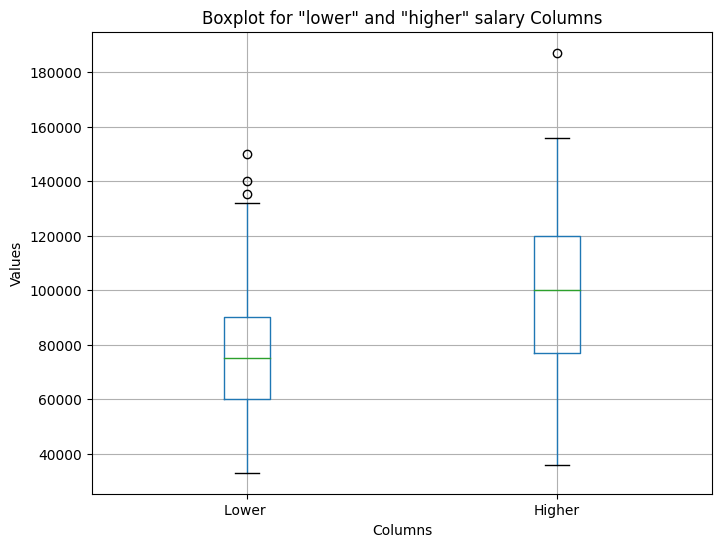

In [24]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Create a new figure with specified dimensions
plt.figure(figsize=(8, 6))

# Plot boxplots for the 'Lower' and 'Higher' columns of the DataFrame 'df'
# Note: Ensure there are no trailing spaces in column names; 'Lower ' might need to be changed to 'Lower'
df.boxplot(column=['Lower ', 'Higher'])

# Set the title of the boxplot
plt.title('Boxplot for "lower" and "higher" salary Columns')

# Set the label for the y-axis
plt.ylabel('Values')

# Set the label for the x-axis
plt.xlabel('Columns')

# Display the plot
plt.show()

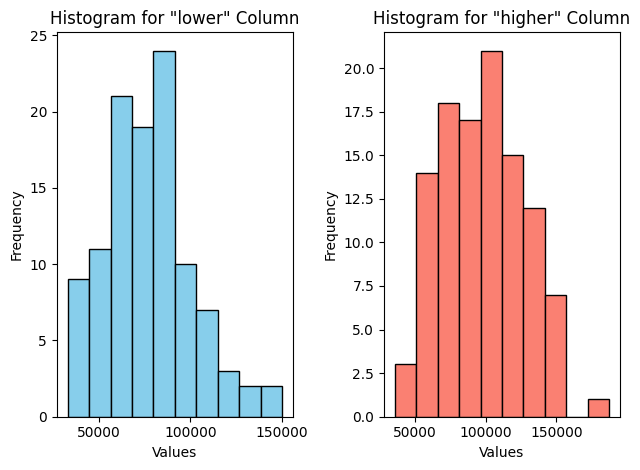

In [26]:
# Histogram for "lower" column
plt.subplot(1, 2, 1)
plt.hist(df['Lower '], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram for "lower" Column')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Histogram for "higher" column
plt.subplot(1, 2, 2)
plt.hist(df['Higher'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram for "higher" Column')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

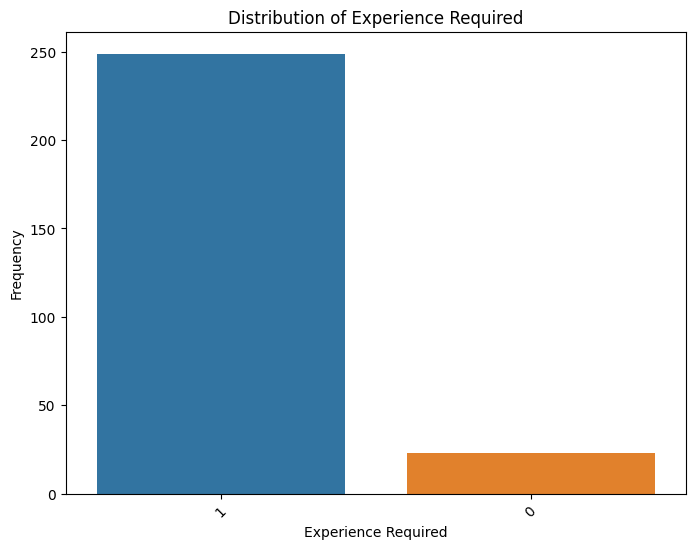

Frequency counts for each category of 'Experience Required':
1    249
0     23
Name: Experience Required, dtype: int64


In [29]:
# Assuming 'Experience Required' is a nominal column in your dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nominal_column = 'Experience Required'

# Calculate frequency counts for each category
experience_counts = df[nominal_column].value_counts()

# Plotting frequency counts using seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=nominal_column, order=experience_counts.index)
plt.title('Distribution of Experience Required')
plt.xlabel('Experience Required')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

# Displaying frequency counts
print("Frequency counts for each category of 'Experience Required':")
print(experience_counts)

In [33]:
# Import the 'ast' module to safely evaluate strings containing Python literals
import ast

# Initialize an empty list to store skills extracted from each job description
skill_list = []

# Iterate over each row in the DataFrame 'df'
for index, value in df.iterrows():
    # Use 'ast.literal_eval' to convert the string in the 'skills' column back into a list
    skills = ast.literal_eval(value['skills'])
    
    # Iterate through each skill in the list and append it to the 'skill_list'
    for skill in skills:
        skill_list.append(skill)

# After the loop, 'skill_list' contains all skills extracted from the DataFrame
skill_list

['design',
 'mechanical',
 'systems',
 'development',
 'industry',
 'standards',
 'project',
 'management',
 '3d',
 'heat',
 'machines',
 'drawings',
 'time',
 'interview',
 'standards',
 'design',
 'quality',
 'professional',
 'operations',
 'process',
 'data',
 'technical',
 'agile',
 'design',
 'quality',
 'control',
 'version',
 'continuous',
 'scrum',
 'professionalism',
 'information',
 'systems',
 'security',
 'time',
 'quality',
 'procedures',
 'processes',
 'professionalism',
 'troubleshooting',
 'management',
 'time',
 'standards',
 'report',
 'quality',
 'professional',
 'control',
 'procedures',
 'communication',
 'building',
 'information',
 'software',
 'quality',
 'technical',
 'data',
 'professionalism',
 'testing',
 'time',
 'sql',
 'resources',
 'professional',
 'time',
 '3d',
 'electrical',
 'design',
 'mechanical',
 'cad',
 'technical',
 'communication',
 'autocad',
 'absorption',
 'electrical',
 'project',
 'design',
 'mechanical',
 'computer',
 'writing',
 'time',

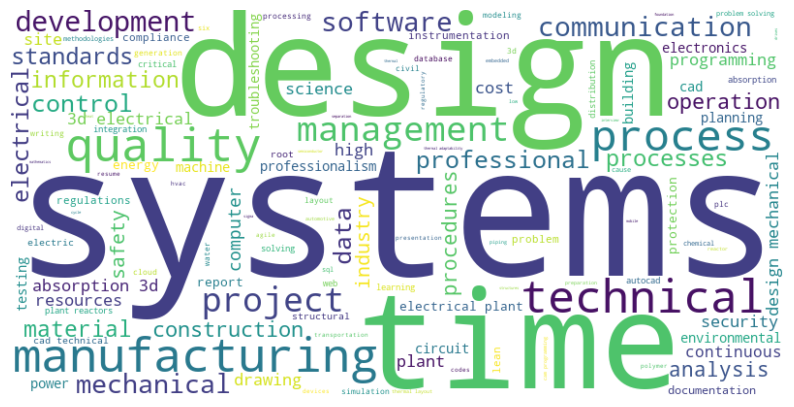

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Join the words into a single string
text = ' '.join(skill_list)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

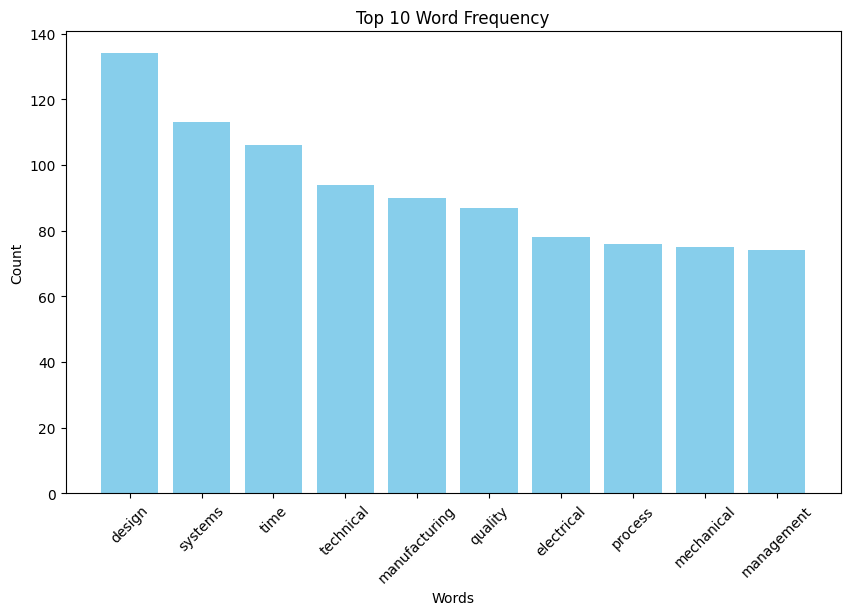

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

# List of words
word_list = ["apple", "banana", "orange", "apple", "grape", "banana", "banana", "orange"]

# Count the frequency of each word
word_counts = Counter(skill_list)

# Extract top 10 words and their counts
top_words_counts = word_counts.most_common(10)
top_words, top_counts = zip(*top_words_counts)

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts, color='skyblue')

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Top 10 Word Frequency')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_decomposition import PLSSVD
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("Invistico_Airline.csv")
new_column = []
for column in data.columns:
    new_column.append(column.replace(" ", "_").replace("/","_").replace("-","_"))
# Preprocessing: Drop missing values and encode categorical variables if necessary
data.dropna(inplace=True)

# For PLS-SEM, encode categorical variables if necessary
# For simplicity, let's assume all variables are numeric for this example
print(new_column)

data.columns = new_column


['satisfaction', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class', 'Flight_Distance', 'Seat_comfort', 'Departure_Arrival_time_convenient', 'Food_and_drink', 'Gate_location', 'Inflight_wifi_service', 'Inflight_entertainment', 'Online_support', 'Ease_of_Online_booking', 'On_board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']


In [32]:
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame 'data'
for column in data.columns:
    # Check if the column's data type is 'object' (string or mixed types are usually considered 'object')
    if data[column].dtype == 'object':
        # Apply LabelEncoder to the column:
        # This converts each unique string value into a unique integer, which is often required for machine learning models
        data[column] = label_encoder.fit_transform(data[column])

# Define exogenous and endogenous variables
exog_vars = ["Gender", "Customer_Type", "Age", "Type_of_Travel", "Class", "Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]
endog_var = "satisfaction"

# Fit the CB-SEM model using statsmodels
model = sm.OLS(data[endog_var], sm.add_constant(data[exog_vars]))
fit = model.fit()

# Print CB-SEM results
print("CB-SEM Results:")
print(fit.summary())



CB-SEM Results:
                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     4604.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:59:39   Log-Likelihood:                -77188.
No. Observations:              129487   AIC:                         1.544e+05
Df Residuals:                  129478   BIC:                         1.545e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cons

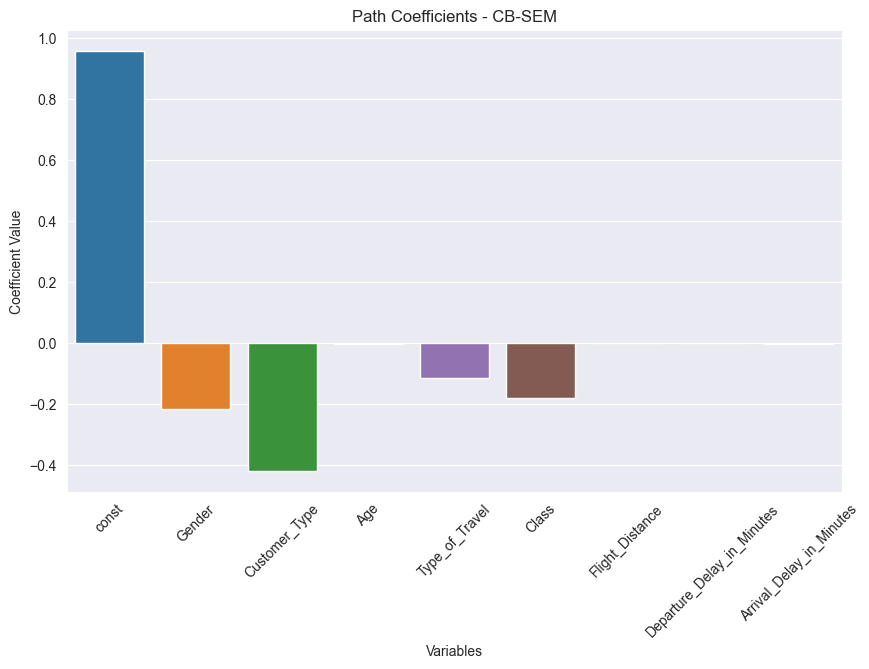

In [33]:
# Visualize CB-SEM coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=fit.params.index, y=fit.params.values)
plt.title("Path Coefficients - CB-SEM")
plt.xlabel("Variables")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

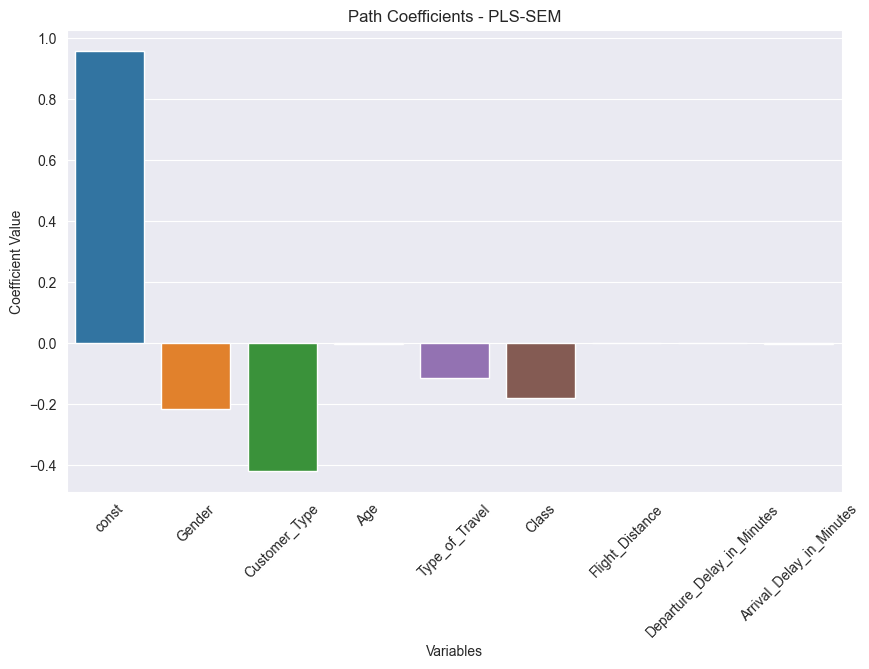

In [39]:
from sklearn.cross_decomposition import PLSSVD
# Extract X and y
X = data.drop(columns=["satisfaction"])
y = data["satisfaction"]

# Fit the PLS-SEM model
pls = PLSSVD(n_components=1)  # Choose the number of components as needed
pls.fit(X, y)

# Compute PLS-SEM loadings
scores = pls.transform(X)

# Compute PLS-SEM weights
# weights = pls.x_rotations_

# Visualize PLS-SEM loadings
plt.figure(figsize=(10, 6))
sns.barplot(x=fit.params.index, y=fit.params.values)
plt.title("Path Coefficients - PLS-SEM")
plt.xlabel("Variables")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

# # Visualize PLS-SEM weights
# plt.figure(figsize=(10, 6))
# sns.heatmap(weights, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# plt.title("Weights - PLS-SEM")
# plt.xlabel("Manifest Variables")
# plt.ylabel("Latent Variables")
# plt.show()

In [41]:
data.to_csv('data.csv',index=False)

In [42]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample DataFrame

data = pd.read_csv('final_integrated_data_revised.csv')
print(data.columns)
data = data[['Field','Lower ','skills']]


Index(['Job Title', 'Company Name', 'Field', 'Location', 'Lower ', 'Higher',
       'Experience Required', 'JD', 'skills'],
      dtype='object')


In [43]:

# Preprocess data
te = TransactionEncoder()
te_ary = te.fit(data['skills']).transform(data['skills'])
skills_df = pd.DataFrame(te_ary, columns=te.columns_)

# Concatenate the one-hot encoded skills with the original DataFrame
df_encoded = pd.concat([data[['Field', 'Lower ']], skills_df], axis=1)

# Perform Association Rule Mining
frequent_itemsets = apriori(df_encoded.drop(['Field', 'Lower '], axis=1), min_support=0.5, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\kakka\AppData\Local\Temp\ipykernel_23952\1325268560.py", line 11, in <cell line: 11>
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
  File "C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\mlxtend\frequent_patterns\association_rules.py", line 171, in association_rules
    consequent = k.difference(antecedent)
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\executing\executing.py", line 312, in executing
    args = executing_cache[key]
KeyError: (<code object <cell line: 11> at 0x000001E7203766B0, file "C:\Users\kakka\AppData\Local\Temp\ipykernel_23952\1325268560.py", 

In [1]:
import pandas as pd

df = pd.read_csv('final_integrated_data_revised.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            270 non-null    object 
 1   Company Name         270 non-null    object 
 2   Field                270 non-null    object 
 3   Location             270 non-null    object 
 4   Lower                153 non-null    float64
 5   Higher               153 non-null    float64
 6   Experience Required  270 non-null    int64  
 7   JD                   270 non-null    object 
 8   skills               270 non-null    object 
 9   technical            153 non-null    object 
 10  non technical        153 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 23.3+ KB


In [2]:
df = pd.get_dummies(df, columns=['Field', ])

In [3]:
df.dropna(inplace=True)
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Lower ', 'Higher',
       'Experience Required', 'JD', 'skills', 'technical', 'non technical',
       'Field_Chemical Engineering', 'Field_Electrical Engineering',
       'Field_Manufacturing/Industrial Engineering',
       'Field_Mechanical Engineering', 'Field_Nuclear Engineer',
       'Field_Project Management/Engineering Management',
       'Field_Software Engineering'],
      dtype='object')

In [4]:
# Import the 'ast' module to use its function for safely evaluating strings as Python expressions
import ast

# Initialize two empty lists to store counts of technical and non-technical skills for each job
tech_count = []
non_tech_count = []

# Iterate over each row in the DataFrame 'df'
for index, values in df.iterrows():
    try:
        # Use 'ast.literal_eval' to safely evaluate the string in the 'technical' column back into a list
        tskill = ast.literal_eval(values['technical'])
        # Use 'ast.literal_eval' to safely evaluate the string in the 'non technical' column back into a list
        ntskill = ast.literal_eval(values['non technical'])
        # Append the length of the technical skills list to 'tech_count'
        tech_count.append(len(tskill))
        # Append the length of the non-technical skills list to 'non_tech_count'
        non_tech_count.append(len(ntskill))
    except:
        # In case of any error during the evaluation (like if the data is not properly formatted), append 0
        tech_count.append(0)
        non_tech_count.append(0)

# Add 'tech_count' as a new column to the DataFrame
df['tech_count'] = tech_count
# Add 'non_tech_count' as a new column to the DataFrame
df['non_tech_count'] = non_tech_count

In [5]:
df.describe()

,Lower,Higher,Experience Required,Field_Chemical Engineering,Field_Electrical Engineering,Field_Manufacturing/Industrial Engineering,Field_Mechanical Engineering,Field_Nuclear Engineer,Field_Project Management/Engineering Management,Field_Software Engineering,tech_count,non_tech_count
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77000.124183,100652.490196,0.973856,0.032680,0.084967,0.385621,0.202614,0.006536,0.124183,0.163399,12.137255,8.091503
std,22091.322106,28948.436214,0.160087,0.178381,0.279749,0.488340,0.403268,0.080845,0.330873,0.370943,4.616986,2.639177
min,33000.000000,36000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62400.000000,80000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,6.000000
50%,74000.000000,100000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000
75%,90000.000000,120000.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,14.000000,10.000000
max,150000.000000,187200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,15.000000


In [22]:

# Define the bins for the 'Higher' salary range
bins = [0, 100000, 290000]

# Define labels for each bin
labels = [0, 1]

# Use pandas 'cut' function to segment the 'Higher' salary values into categorical bins
# 'labels' are used to name the bins
df['higher_bin'] = pd.cut(df['Higher'], bins, labels=labels)


<AxesSubplot:>

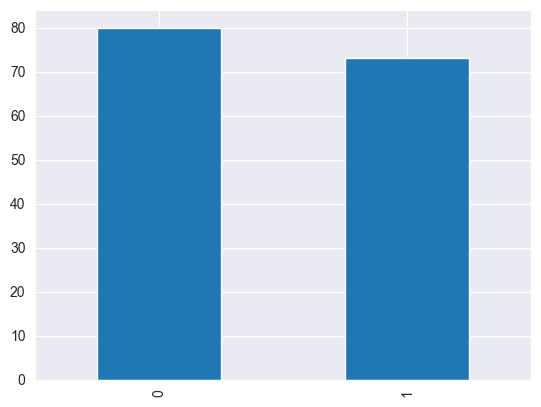

In [23]:
# Count the number of occurrences for each bin and plot these counts as a bar chart
df['higher_bin'].value_counts().plot(kind='bar')

In [35]:
# Import necessary modules from scikit-learn for logistic regression and model evaluation
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the feature set 'X' using specific columns related to engineering fields and skill counts
X = df[[
       'Field_Manufacturing/Industrial Engineering',
       'Field_Mechanical Engineering',
       'Field_Project Management/Engineering Management',
       'Field_Software Engineering', 'tech_count', 'non_tech_count']]

# Define the target variable 'y' based on the 'higher_bin' column, which is a categorical representation of salary ranges
y = df[['higher_bin']]

# Split the dataset into training and testing sets with 15% of the data used for testing
# 'random_state' is set for reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize a Logistic Regression classifier with a given random state for reproducibility
clf = LogisticRegression(random_state=0)

# Fit the Logistic Regression model to the training data
clf.fit(X = X_train, y = y_train)



C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [36]:
print(clf.coef_)
print(clf.intercept_)

[[-0.59280199 -0.91519038 -0.20038238 -0.42365264  0.06421963 -0.06143351]]
[0.04982081]


In [37]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [38]:
y_test

,higher_bin
84,1
86,0
97,1
115,0
29,1
114,0
78,0
81,0
18,1
15,1


In [39]:
# Import the accuracy_score function from sklearn.metrics to calculate the model's accuracy
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the logistic regression model using the test set
# 'y_pred' should be defined as the model's predictions for 'X_test', assumed to be defined in your previous code
accuracy_score(y_test, y_pred)

# Import the classification_report function from sklearn.metrics to get a detailed performance report
from sklearn.metrics import classification_report

# Define target class names for clarity in the classification report
target_names = ['class 0', 'class 1']

# Generate and print a classification report to evaluate the model
# The report includes key metrics like precision, recall, f1-score for each class
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.45      0.90      0.60        10
     class 1       0.67      0.15      0.25        13

    accuracy                           0.48        23
   macro avg       0.56      0.53      0.42        23
weighted avg       0.57      0.48      0.40        23


In [40]:
# Import the DecisionTreeClassifier from sklearn.tree for classification tasks
from sklearn.tree import DecisionTreeClassifier
# Import cross_val_score to evaluate a model using cross-validation
from sklearn.model_selection import cross_val_score

# Initialize a Decision Tree Classifier with a specific random state for reproducibility
clf = DecisionTreeClassifier(random_state=0)

# Fit the Decision Tree Classifier to the training data
clf.fit(X = X_train, y = y_train)

# Use the trained classifier to make predictions on the test set
y_pred = clf.predict(X_test)

# Define the names of the target classes for better clarity in the report
target_names = ['class 0', 'class 1']

# Print the classification report, which includes precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.60      0.60      0.60        10
     class 1       0.69      0.69      0.69        13

    accuracy                           0.65        23
   macro avg       0.65      0.65      0.65        23
weighted avg       0.65      0.65      0.65        23


In [41]:
# Import the RandomForestClassifier from sklearn.ensemble to use for classification tasks
from sklearn.ensemble import RandomForestClassifier
# Import cross_val_score to evaluate a model using cross-validation
from sklearn.model_selection import cross_val_score

# Initialize a RandomForestClassifier with a specified maximum depth and random state for reproducibility
clf = RandomForestClassifier(max_depth=2, random_state=0)

# Fit the RandomForestClassifier to the training data
clf.fit(X = X_train, y = y_train)

# Use the trained classifier to make predictions on the test dataset
y_pred = clf.predict(X_test)

# Define names for the target classes to provide better clarity in the classification report
target_names = ['class 0', 'class 1']

# Print the classification report, which includes precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.54      0.70      0.61        10
     class 1       0.70      0.54      0.61        13

    accuracy                           0.61        23
   macro avg       0.62      0.62      0.61        23
weighted avg       0.63      0.61      0.61        23


C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [42]:
# Import the GradientBoostingClassifier from sklearn.ensemble for use in classification tasks
from sklearn.ensemble import GradientBoostingClassifier
# Import cross_val_score to evaluate the model using cross-validation techniques
from sklearn.model_selection import cross_val_score

# Initialize a GradientBoostingClassifier with specific settings for max_depth and random state
# max_depth is set to 1 to limit the complexity of individual trees, reducing overfitting risk
# random_state is used to ensure reproducibility of results
clf = GradientBoostingClassifier(max_depth=1, random_state=0)

# Fit the Gradient Boosting model to the training data
clf.fit(X = X_train, y = y_train)

# Use the trained classifier to make predictions on the test dataset
y_pred = clf.predict(X_test)

# Define names for the target classes to provide better clarity in the classification report
target_names = ['class 0', 'class 1']

# Print the classification report, which includes precision, recall, and F1-score for each class
# This helps to assess the effectiveness of the model in correctly classifying each class
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.53      0.80      0.64        10
     class 1       0.75      0.46      0.57        13

    accuracy                           0.61        23
   macro avg       0.64      0.63      0.61        23
weighted avg       0.66      0.61      0.60        23


C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [178]:
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Lower ', 'Higher',
       'Experience Required', 'JD', 'skills', 'technical', 'non technical',
       'Field_Chemical Engineering', 'Field_Electrical Engineering',
       'Field_Manufacturing/Industrial Engineering',
       'Field_Mechanical Engineering', 'Field_Nuclear Engineer',
       'Field_Project Management/Engineering Management',
       'Field_Software Engineering', 'tech_count', 'non_tech_count',
       'higher_bin'],
      dtype='object')

In [179]:
df.head()

,Job Title,Company Name,Location,Lower,Higher,Experience Required,JD,skills,technical,non technical,Field_Chemical Engineering,Field_Electrical Engineering,Field_Manufacturing/Industrial Engineering,Field_Mechanical Engineering,Field_Nuclear Engineer,Field_Project Management/Engineering Management,Field_Software Engineering,tech_count,non_tech_count,higher_bin
0,senior control systems engineer (chemical),Infinitek,United,150000.0,150000.0,1,Join a leading chemical manufacturing company ...,"['systems', 'control', 'manufacturing', 'proce...","[ ""Control Systems Engineering"", ""Process Auto...","[ ""Collaboration"", ""Innovation"", ""Problem Solv...",1,0,0,0,0,0,0,11,11,3
1,chief operating officer (coo),Confidential,Hazleton,140000.0,150000.0,1,Company Overview\nWe are a dynamic and rapidly...,"['project', 'management', 'construction', 'ope...","[ ""Leadership"", ""Strategic Planning"", ""Financi...","[ ""Communication"", ""Problem Solving"", ""Team Ma...",0,0,0,0,0,1,0,15,11,3
2,project engineer,Entegee,Allentown,135200.0,156000.0,1,Project Engineer\n**Must have some hands on te...,"['technical', 'development', 'information', 's...","[ ""Product Design"", ""Product Development"", ""Re...","[ ""Hands-on Technical Experience"", ""Problem So...",0,0,0,0,0,1,0,11,9,3
3,mechanical engineer (nuclear/rotating equipment),Rise Technical Recruitment Limited,Bethlehem,132000.0,150000.0,1,Mechanical Engineer (Nuclear/Rotating equipmen...,"['analysis', 'mechanical', 'structural', 'nucl...","[ ""Structural Analysis"", ""Nuclear Engineering""...","[ ""Career Development"", ""Professional Growth"",...",0,0,1,0,0,0,0,8,10,3
4,opto-mechanical product engineer,Cisco Systems,Allentown,122000.0,177000.0,1,What You'll Do \n Optics Operations is an orga...,"['design', 'mechanical', 'data', 'analysis', '...","[ ""Opto-mechanical Design"", ""Product Performan...","[ ""Communication"", ""Problem Solving"", ""Team Co...",0,0,0,1,0,0,0,12,5,3


In [180]:
# Remove any rows in the DataFrame 'df' that contain missing values
df.dropna(inplace=True)

# Define bins for the 'Lower' salary range to categorize salaries into different groups
bins = [0, 62000, 74000, 90000, 200000]

# Define labels for each bin to represent different salary ranges
labels = [0, 1, 2, 3]

# Use pandas 'cut' function to categorize the 'Lower' salary values into defined bins using the labels
df['lower_bin'] = pd.cut(df['Lower '], bins, labels=labels)

<AxesSubplot:>

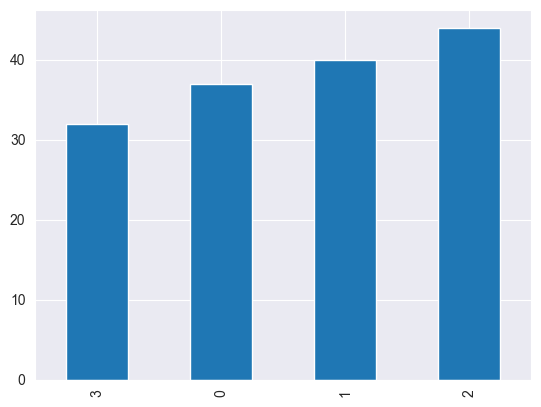

In [218]:
# Count the occurrences of each bin and sort them for better visualization (fix typo in the method name)
df['lower_bin'].value_counts().sort_values().plot(kind='bar')

In [182]:
# Select specific columns from the DataFrame 'df' to use as features for the model
# These features include specific engineering fields and counts of technical and non-technical skills
X = df[[
       'Field_Manufacturing/Industrial Engineering',
       'Field_Mechanical Engineering',
       'Field_Project Management/Engineering Management',
       'Field_Software Engineering', 'tech_count', 'non_tech_count']]

# Select the 'lower_bin' column from the DataFrame 'df' to use as the target variable
y = df[['lower_bin']]

# Split the dataset into training and testing sets using the train_test_split function
# 25% of the data is used as the test set, and the random_state is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize a Logistic Regression classifier with a specific random state for reproducibility
clf = LogisticRegression(random_state=0)

# Fit the Logistic Regression model to the training data
# This step involves learning the relationship between the features and the target variable using the training data
clf.fit(X = X_train, y = y_train)

C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kakka\OneDrive\Documents\EFF2.1\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [183]:
print(clf.coef_)
print(clf.intercept_)

[[ 0.09914064  0.01719117 -0.13316722  0.85044018 -0.1288984   0.048397  ]
 [ 0.28792433  0.71108092  0.31237097 -0.20900669  0.00265332 -0.06243873]
 [ 0.37806875  0.33274834  0.20098741 -0.07806365  0.07394632 -0.13027527]
 [-0.76513372 -1.06102043 -0.38019115 -0.56336985  0.05229876  0.14431699]]
[ 1.06416435  0.30349135  0.19215037 -1.55980607]


In [184]:
y_pred = clf.predict(X_test)
y_pred

array([2, 1, 2, 0, 0, 0, 0, 3, 2, 3, 2, 0, 3, 0, 0, 1, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 3, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0], dtype=int64)

In [185]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.28205128205128205

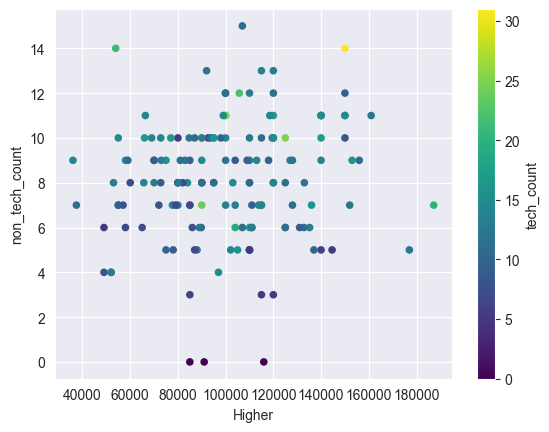

In [186]:
import matplotlib.pyplot as plt
df.plot.scatter(x='Higher',y='non_tech_count',c='tech_count',colormap='viridis')
plt.show()

In [15]:
# Filter the DataFrame 'df' to include only those rows where the 'higher_bin' value is 3
df_high_bin = df[df['higher_bin'] == 3]

In [16]:
# Initialize two lists to store technical and non-technical skills from the filtered rows
tech_skills = []
non_tech_skills = []

# Iterate over each row in the filtered DataFrame 'df_high_bin'
for index, values in df_high_bin.iterrows():
    try:
        # Safely evaluate the string representation of technical skills list back into a Python list
        skills = ast.literal_eval(values['technical'])
        # Iterate over each skill in the technical skills list
        for skill in skills:
            # Convert each skill to lowercase and strip any extra spaces, then append to the tech_skills list
            tech_skills.append(skill.lower().strip())
        
        # Safely evaluate the string representation of non-technical skills list back into a Python list
        nskills = ast.literal_eval(values['non technical'])
        # Iterate over each skill in the non-technical skills list
        for skill in nskills:
            # Convert each skill to lowercase and strip any extra spaces, then append to the non_tech_skills list
            non_tech_skills.append(skill.lower().strip())
    except:
        # If an error occurs during the evaluation (likely due to malformatted string), print the problematic strings
        print(values['technical'])
        print(values['non technical'])
    
# Print the total number of unique technical skills collected
print(len(set(tech_skills)))
# Print the total number of unique non-technical skills collected
print(len(set(non_tech_skills)))


409
261


In [17]:
print(len(list(set(tech_skills))))
print(len(list(set(non_tech_skills))))

371
118


In [18]:
from collections import Counter

# Count the occurrences of each skill in the 'tech_skills' list using the Counter from the collections module
skill_counts = Counter(tech_skills)

# Iterate over the skill counts
for skill, count in skill_counts.items():
    # Check if the skill appears more than once
    if count > 1:
        # Print the skill and its count if it appears more than once
        print(skill, count)

leadership 3
strategic planning 2
project management 8
risk management 2
product development 3
technical leadership 2
technical leadership 2
project management 8
product development 3
ac-to-dc converter design 2
dc-to-dc converter design 2
detailed circuit design 2
power semiconductor characteristics 2
end-to-end power conversion applications 2
simulation of power switching circuits 2
spice simulation 2
schematic capture 2
printed circuit layout 2
component selection 2
leadership 3
project management 8
product development 3
ac-to-dc converter design 2
dc-to-dc converter design 2
detailed circuit design 2
power semiconductor characteristics 2
end-to-end power conversion applications 2
simulation of power switching circuits 2
spice simulation 2
schematic capture 2
printed circuit layout 2
component selection 2
software development 5
documentation 2
commissioning 2
continuous improvement 2
project management 8
software development 5
commissioning 2
problem solving 2
leadership 3
data inte

In [19]:
# Iterate over each skill in the list of non-technical skills
for skill in non_tech_skills:
    # Count the occurrences of each skill in the list
    # If the count is greater than one, indicating the skill appears multiple times
    if non_tech_skills.count(skill) > 1:
        # Print the skill and the number of times it appears in the list
        print(skill, non_tech_skills.count(skill))

collaboration 4
innovation 2
problem solving 18
leadership 10
strategic thinking 4
communication 21
time management 12
adaptability 16
stakeholder management 2
communication 21
problem solving 18
collaboration 4
adaptability 16
interpersonal skills 4
relationship building 4
time management 12
self-motivation 5
problem solving 18
team collaboration 6
project management 4
communication 21
attention to detail 13
flexibility 3
adaptability 16
time management 12
problem solving 18
team collaboration 6
communication 21
analytical thinking 4
attention to detail 13
adaptability 16
time management 12
communication 21
problem solving 18
team collaboration 6
self-motivation 5
leadership 10
collaboration 4
problem solving 18
time management 12
communication 21
adaptability 16
analytical thinking 4
communication 21
problem solving 18
decision making 3
leadership 10
teamwork 12
problem solving 18
attention to detail 13
communication 21
teamwork 12
time management 12
adaptability 16
presentation skil

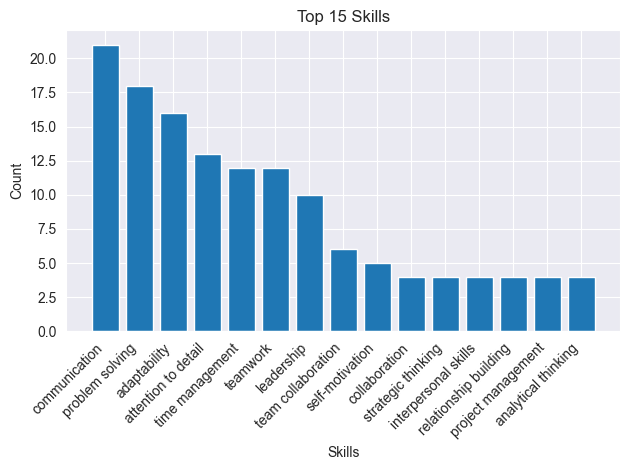

In [20]:
# Import necessary modules for plotting and data manipulation
import matplotlib.pyplot as plt
from collections import Counter

# Define a function to plot a bar chart for the top 15 most common strings from a list
def plot_bar_chart(strings):
    # Use Counter to count occurrences of each string in the provided list
    string_counts = Counter(strings)
    
    # Retrieve the 15 most common strings and their counts from the list
    most_common_strings = string_counts.most_common(15)
    # Separate the strings and their counts into two lists for plotting
    unique_strings = [item[0] for item in most_common_strings]
    counts = [item[1] for item in most_common_strings]
    
    # Create a bar chart using the counted data
    plt.bar(unique_strings, counts)
    plt.xlabel('Skills')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis
    plt.title('Top 15 Skills')  # Title of the plot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding
    plt.show()  # Display the plot

# Call the function with the list 'non_tech_skills' to plot the bar chart
plot_bar_chart(non_tech_skills)


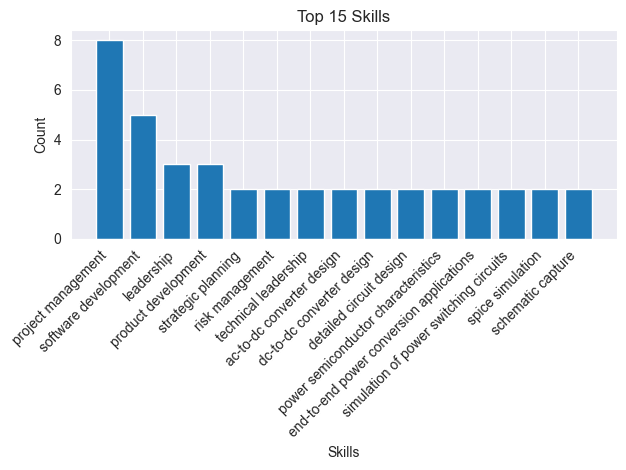

In [21]:
plot_bar_chart(tech_skills)

In [297]:
# Filter the DataFrame 'df' to include only those rows where the 'higher_bin' value is 0
df_high_bin = df[df['higher_bin'] == 0]

# Initialize two lists to store the lists of technical and non-technical skills
tech_trans = []
non_tech_trans = []

# Iterate over each row in the filtered DataFrame 'df_high_bin'
for index, values in df_high_bin.iterrows():
    try:
        # Use 'ast.literal_eval' to safely evaluate the string in the 'technical' column back into a list
        skills = ast.literal_eval(values['technical'])
        # Append the list of technical skills to the 'tech_trans' list
        tech_trans.append(skills)
        
        # Use 'ast.literal_eval' to safely evaluate the string in the 'non technical' column back into a list
        nskills = ast.literal_eval(values['non technical'])
        # Append the list of non-technical skills to the 'non_tech_trans' list
        non_tech_trans.append(nskills)
    except:
        # If an error occurs during the evaluation (likely due to malformatted string), print the problematic strings
        print(values['technical'])
        print(values['non technical'])
    
# Print the list of lists of technical skills collected
print(tech_trans)
# print(non_tech_trans)

[['Mechanical Experience', 'Basic Understanding of Mechanical Principles', 'Technical Sales Presentations', 'Customer Inquiry Management', 'Networking and Prospecting'], ['Mechanical Systems Design', 'Structural Analysis', '3D Modeling (SolidWorks or Creo)', 'Mechanical Drawing', 'Prototype Development', 'Verification and Validation Testing', 'Project Management', 'Technical Leadership', 'Geometric Dimensioning and Tolerancing (GD&T)', 'Product Lifecycle Management (PLM)', 'Finite Element Analysis (FEA)', 'Permanent Magnet DC Motor Theory', 'Lean Principles', 'Fabrication (Machining, Welding)'], ['CNC Programming (G-code)', 'MasterCam', 'Tooling Selection', 'Tool Life Management', 'Work Instruction Development', 'First Piece Inspection', 'Cycle Time Optimization', 'Blueprint Reading', 'Precision Measurement', 'SPC (Statistical Process Control)', 'Continuous Improvement', 'Geometric Tolerancing', 'Micro Finish Understanding', 'SolidWorks (Desirable)'], ['CREO Modeling', 'Mechanical Asse

In [1]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'eggs'],
    ['bread', 'butter'],
    ['bread', 'eggs']
]
# Instantiate TransactionEncoder
encoder = TransactionEncoder()

# Encode the transaction data into a binary format
transaction_array = encoder.fit_transform(tech_trans)

# Convert the transaction data into one-hot encoded format
# Convert the encoded array into a DataFrame
df_encoded = pd.DataFrame(transaction_array, columns=encoder.columns_)

# Perform Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.04, use_colnames=True)

# Extract association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Display the association rules
rules

NameError: name 'tech_trans' is not defined